In [6]:
#Import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [7]:
df= pd.read_csv("fifa_countries_audience.csv")

In [8]:
df.head()

,country,confederation,population_share,tv_audience_share,gdp_weighted_share
0,United States,CONCACAF,4.5,4.3,11.3
1,Japan,AFC,1.9,4.9,9.1
2,China,AFC,19.5,14.8,7.3
3,Germany,UEFA,1.2,2.9,6.3
4,Brazil,CONMEBOL,2.8,7.1,5.4


In [9]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
print(percent_missing)

country               0.0
confederation         0.0
population_share      0.0
tv_audience_share     0.0
gdp_weighted_share    0.0
dtype: float64


In [10]:
df.count()

country               191
confederation         191
population_share      191
tv_audience_share     191
gdp_weighted_share    191
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             191 non-null    object 
 1   confederation       191 non-null    object 
 2   population_share    191 non-null    float64
 3   tv_audience_share   191 non-null    float64
 4   gdp_weighted_share  191 non-null    float64
dtypes: float64(3), object(2)
memory usage: 7.6+ KB


In [51]:
print(df.shape)

(191, 5)


In [52]:
row, col = df.shape
print(row)

191


In [53]:
print(col)

5


In [54]:
df.iloc[:,2:5].apply(np.mean)

population_share      0.522513
tv_audience_share     0.523037
gdp_weighted_share    0.520419
dtype: float64

In [11]:
df.iloc[:,2:5].apply(np.median)

population_share      0.1
tv_audience_share     0.1
gdp_weighted_share    0.0
dtype: float64

In [12]:
df['population_share'].round(2).mode()

0    0.0
Name: population_share, dtype: float64

In [13]:
df['gdp_weighted_share'].round(2).mode()

0    0.0
Name: gdp_weighted_share, dtype: float64

In [14]:
df['tv_audience_share'].round(2).mode()

0    0.0
Name: tv_audience_share, dtype: float64

In [15]:
df.round(2).mode()

,country,confederation,population_share,tv_audience_share,gdp_weighted_share
0,Afghanistan,CAF,0.0,0.0,0.0
1,Albania,NaN,NaN,NaN,NaN
2,Algeria,NaN,NaN,NaN,NaN
3,American Samoa,NaN,NaN,NaN,NaN
4,Angola,NaN,NaN,NaN,NaN
...,...,...,...,...,...
186,Venezuela,NaN,NaN,NaN,NaN
187,Vietnam,NaN,NaN,NaN,NaN
188,Yemen,NaN,NaN,NaN,NaN
189,Zambia,NaN,NaN,NaN,NaN


In [16]:
df.corr()

,population_share,tv_audience_share,gdp_weighted_share
population_share,1.000000,0.731324,0.447268
tv_audience_share,0.731324,1.000000,0.770779
gdp_weighted_share,0.447268,0.770779,1.000000


The correlation coefficient for population_share is 0.45 and the correlation coefficient for tv_audience_share is 0.77. This suggests that there is a stronger relationship between the dependent variable (gdp_weighted_share) and tv_audience_share compared to population_share. This means that tv_audience_share may be a more suitable independent variable to use in a linear regression model, as it is more strongly correlated with the dependent variable.

In [17]:
df.iloc[:,2:5].apply(np.std)

population_share      1.955196
tv_audience_share     1.445735
gdp_weighted_share    1.453774
dtype: float64

In [18]:
df.std()

C:\Users\Lamine Diakite\AppData\Local\Temp\ipykernel_24740\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


population_share      1.960335
tv_audience_share     1.449535
gdp_weighted_share    1.457594
dtype: float64

In [19]:
df.iloc[:,2:5].apply(np.var)

population_share      3.822792
tv_audience_share     2.090150
gdp_weighted_share    2.113457
dtype: float64

In [20]:
df.var()

C:\Users\Lamine Diakite\AppData\Local\Temp\ipykernel_24740\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


population_share      3.842912
tv_audience_share     2.101151
gdp_weighted_share    2.124581
dtype: float64

In [21]:
df['population_share']

0       4.5
1       1.9
2      19.5
3       1.2
4       2.8
       ... 
186     0.0
187     0.1
188     0.0
189     0.0
190     0.0
Name: population_share, Length: 191, dtype: float64

In [22]:
df['tv_audience_share']

0       4.3
1       4.9
2      14.8
3       2.9
4       7.1
       ... 
186     0.0
187     0.0
188     0.0
189     0.0
190     0.0
Name: tv_audience_share, Length: 191, dtype: float64

In [23]:
df['gdp_weighted_share']

0      11.3
1       9.1
2       7.3
3       6.3
4       5.4
       ... 
186     0.0
187     0.0
188     0.0
189     0.0
190     0.0
Name: gdp_weighted_share, Length: 191, dtype: float64

In [24]:
df['population_share'].value_counts()

0.0     61
0.1     49
0.2     21
0.3     12
0.4      9
0.5      6
0.7      6
0.9      4
1.1      3
0.6      3
1.3      2
0.8      1
1.4      1
2.5      1
17.6     1
2.3      1
4.5      1
1.9      1
1.0      1
1.7      1
3.5      1
2.1      1
2.8      1
1.2      1
19.5     1
2.2      1
Name: population_share, dtype: int64

In [25]:
df['tv_audience_share'].value_counts()

0.0     67
0.1     46
0.2     19
0.3     15
0.5      7
0.4      6
0.7      3
0.8      2
2.6      2
0.6      2
1.8      2
2.1      2
2.0      2
3.2      1
0.9      1
14.8     1
2.9      1
7.1      1
3.1      1
1.3      1
2.3      1
1.0      1
1.6      1
6.7      1
1.2      1
4.9      1
1.5      1
2.4      1
4.3      1
Name: tv_audience_share, dtype: int64

In [26]:
df['gdp_weighted_share'].value_counts()

0.0     101
0.1      30
0.3       7
0.5       7
0.2       6
0.6       6
0.4       5
0.7       5
4.0       2
0.9       2
1.0       2
1.6       2
1.3       1
0.8       1
1.2       1
11.3      1
9.1       1
2.0       1
2.6       1
2.9       1
3.0       1
3.1       1
3.5       1
4.2       1
5.4       1
6.3       1
7.3       1
1.5       1
Name: gdp_weighted_share, dtype: int64

In [27]:
len(df['tv_audience_share'].value_counts().index),len(df['confederation'].value_counts().index),len(df['population_share'].value_counts().index),len(df['gdp_weighted_share'].value_counts().index),len(df['country'].value_counts().index)

(29, 6, 26, 28, 191)

In [28]:
len(df['country'].value_counts().index)

191

In [73]:
df['confederation'].value_counts()

CAF         50
UEFA        46
AFC         43
CONCACAF    30
OFC         12
CONMEBOL    10
Name: confederation, dtype: int64

In [74]:
df['confederation'].value_counts().index

Index(['CAF', 'UEFA', 'AFC', 'CONCACAF', 'OFC', 'CONMEBOL'], dtype='object')

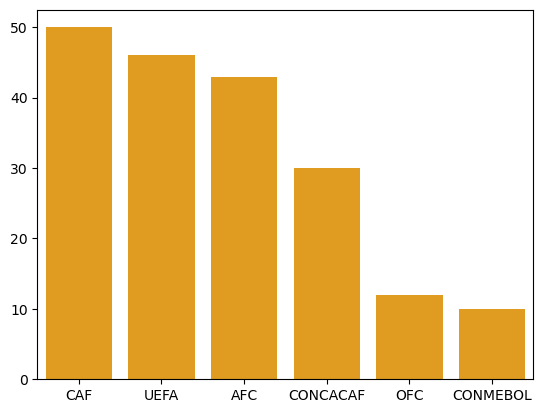

In [29]:
ax=sns.barplot(x=df['confederation'].value_counts().index,
               y=df['confederation'].value_counts().values,
               color='orange')


In [76]:
df['population_share'].value_counts().index,

(Float64Index([ 0.0,  0.1,  0.2,  0.3,  0.4,  0.5,  0.7,  0.9,  1.1,  0.6,  1.3,
                0.8,  1.4,  2.5, 17.6,  2.3,  4.5,  1.9,  1.0,  1.7,  3.5,  2.1,
                2.8,  1.2, 19.5,  2.2],
              dtype='float64'),)

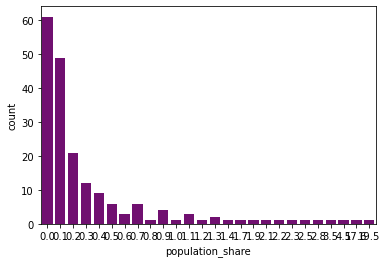

In [77]:
ax=sns.countplot(x='population_share',data=df ,color='purple')

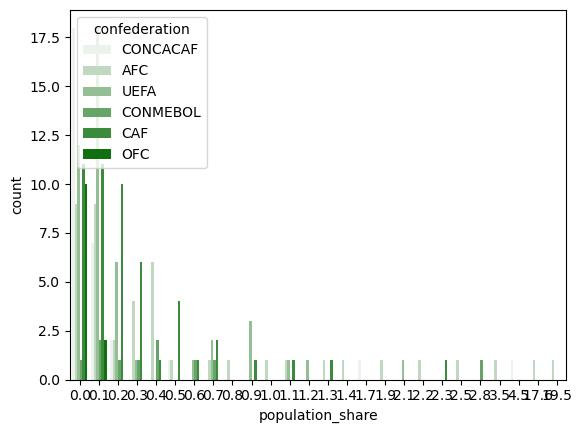

In [30]:
ax=sns.countplot(x='population_share',hue='confederation', data= df , color='green')

([<matplotlib.patches.Wedge at 0x1ae7f428760>,
 [Text(-0.8060640088728556, 0.7485057204857029, 'CAF'),
  Text(-0.7418513471048707, -0.8121924518232664, 'UEFA'),
  Text(0.7283926053612549, -0.824284060536805, 'AFC'),
  Text(1.0319321717756955, 0.38094093092538156, 'CONCACAF'),
  Text(0.5526094487203836, 0.9511166054616825, 'OFC'),
  Text(0.18011475534378132, 1.0851537563439801, 'CONMEBOL')],
 [Text(-0.43967127756701213, 0.40827584753765606, '26.18%'),
  Text(-0.4046461893299294, -0.4430140646308725, '24.08%'),
  Text(0.39730505746977535, -0.44960948756553, '22.51%'),
  Text(0.5628720936958339, 0.20778596232293536, '15.71%'),
  Text(0.30142333566566376, 0.5187908757063722, '6.28%'),
  Text(0.09824441200569889, 0.5919020489148982, '5.24%')])

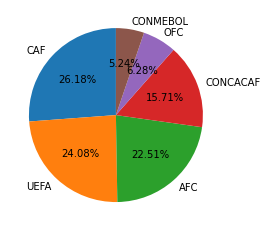

In [79]:
fig1, ax1=plt.subplots()
x=list(df['confederation'].value_counts().index)
y=list(df['confederation'].value_counts())
ax1.pie(y, labels=x, autopct='%1.2f%%', startangle=90)

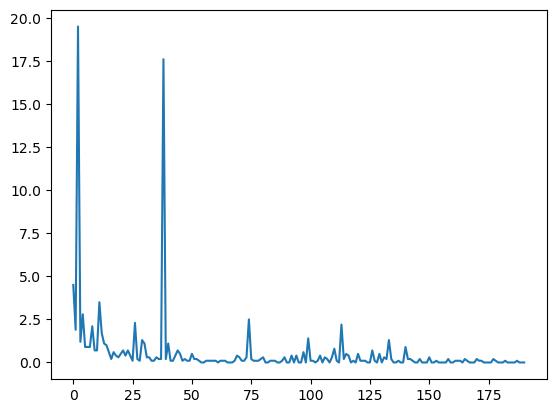

In [31]:
plt.plot(df['population_share'])

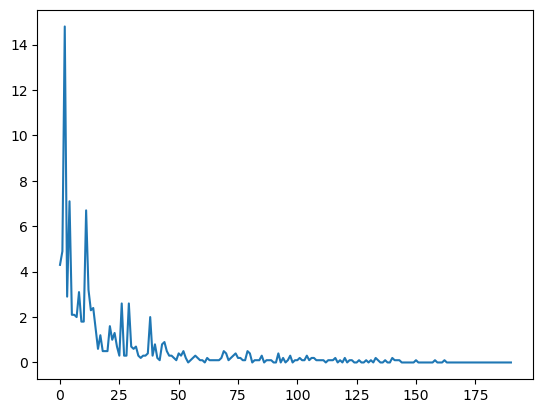

In [33]:
plt.plot(df['tv_audience_share'])

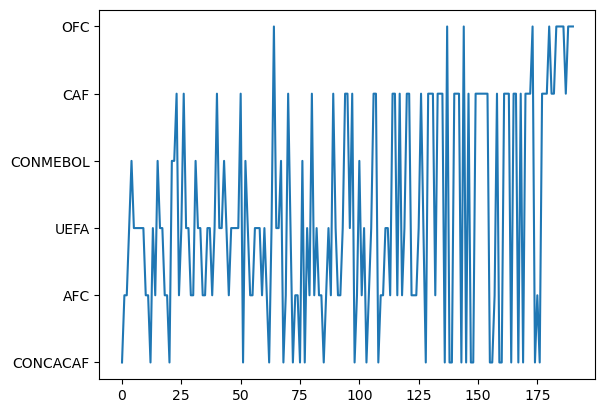

In [34]:
plt.plot(df['confederation'])

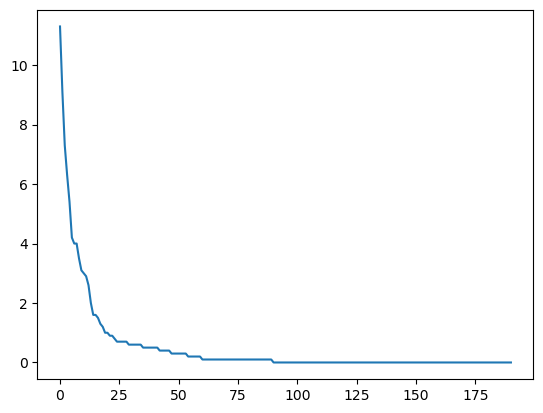

In [35]:
plt.plot(df['gdp_weighted_share'])

In [36]:
zero_variance_categorical_variables = []
# categorical variables with zero variance goes in here

for column in df: #for each column
    if len(pd.unique(df[column]))==1: #check the length, if 1, means zero variance
        zero_variance_categorical_variables.append(column)
print(zero_variance_categorical_variables) #these are the columns with zero variance


# categorical variables goes in here
for item in zero_variance_categorical_variables:#dropping the required columns
    df.drop(columns = [item],inplace=True)


[]


In [38]:
categorical_varables = list(set(df.dtypes[df.dtypes == object].index))
# your code to find the 
# categorical variables with high variance (i.e., cardinality) goes in here
high_cardinality_categorical_variables = []
for i in categorical_varables:
  if len(df[i].value_counts().index) > 190:
    high_cardinality_categorical_variables.append(i)


# your code to drop the high cardinality
# categorical variables goes in here 
df = df.drop(columns=high_cardinality_categorical_variables)

In [42]:
new_df =df
# We are extracting columns which has numerical value
with_numerical_value = df.select_dtypes(include=np.number)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(with_numerical_value)
#above line changes all the data in standardized form.

# Converting scaled values(ndarray) to dataframe.
scaled_df = pd.DataFrame(data= scaler.fit_transform(with_numerical_value),columns= with_numerical_value.columns.tolist())    #column names

df = df.drop(columns=with_numerical_value,axis=1)

# your code to standardize numerical variables goes in here
df = pd.concat([df,scaled_df],axis=1)
df

,confederation,population_share,tv_audience_share,gdp_weighted_share
0,CONCACAF,2.034316,2.612486,7.414897
1,AFC,0.704526,3.027500,5.901594
2,AFC,9.706181,9.875228,4.663437
3,UEFA,0.346506,1.644121,3.975572
4,CONMEBOL,1.164838,4.549217,3.356493
...,...,...,...,...
186,OFC,-0.267243,-0.361779,-0.357978
187,CAF,-0.216098,-0.361779,-0.357978
188,OFC,-0.267243,-0.361779,-0.357978
189,OFC,-0.267243,-0.361779,-0.357978


In [46]:
df.drop(columns=['country'] , inplace = True)

KeyError: "['country'] not found in axis"

In [47]:
df.drop(columns=['confederation'] , inplace = True)

KeyError: "['confederation'] not found in axis"

In [48]:
df

,population_share,tv_audience_share,gdp_weighted_share
0,2.034316,2.612486,7.414897
1,0.704526,3.027500,5.901594
2,9.706181,9.875228,4.663437
3,0.346506,1.644121,3.975572
4,1.164838,4.549217,3.356493
...,...,...,...
186,-0.267243,-0.361779,-0.357978
187,-0.216098,-0.361779,-0.357978
188,-0.267243,-0.361779,-0.357978
189,-0.267243,-0.361779,-0.357978


In [51]:
df_train=pd.read_csv('fifa_countries_audience.csv')
target= 'population_share'
df_train.head()

,country,confederation,population_share,tv_audience_share,gdp_weighted_share
0,United States,CONCACAF,4.5,4.3,11.3
1,Japan,AFC,1.9,4.9,9.1
2,China,AFC,19.5,14.8,7.3
3,Germany,UEFA,1.2,2.9,6.3
4,Brazil,CONMEBOL,2.8,7.1,5.4


In [52]:
print(df_train.describe().iloc[:, :10])

       population_share  tv_audience_share  gdp_weighted_share
count        191.000000         191.000000          191.000000
mean           0.522513           0.523037            0.520419
std            1.960335           1.449535            1.457594
min            0.000000           0.000000            0.000000
25%            0.000000           0.000000            0.000000
50%            0.100000           0.100000            0.000000
75%            0.350000           0.300000            0.300000
max           19.500000          14.800000           11.300000


count    191.000000
mean       0.522513
std        1.960335
min        0.000000
25%        0.000000
50%        0.100000
75%        0.350000
max       19.500000
Name: population_share, dtype: float64
/n


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


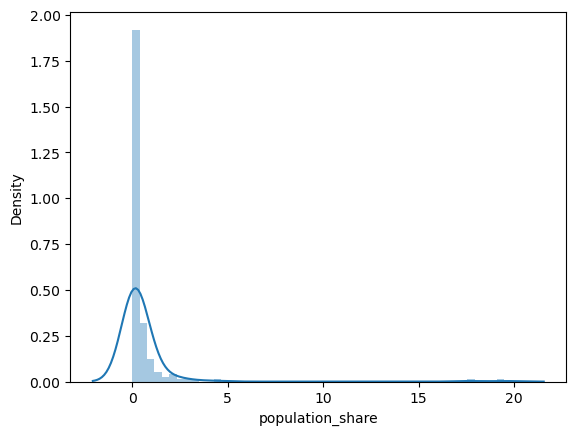

In [53]:
print(df_train['population_share'].describe())
print('/n')
ax = sns.distplot(df_train['population_share'])

In [54]:
# Select the dependent and independent variables
X = df['tv_audience_share']
y = df['gdp_weighted_share']

In [55]:
# Add a constant term to the independent variable
X = sm.add_constant(X)

In [56]:
# Fit the model
model = sm.OLS(y, X).fit()

The model will be fit using the ordinary least squares (OLS) method

In [57]:
# Make predictions
predictions = model.predict(X)

In [58]:
# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     gdp_weighted_share   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     276.6
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           7.42e-39
Time:                        18:56:24   Log-Likelihood:                -184.91
No. Observations:                 191   AIC:                             373.8
Df Residuals:                     189   BIC:                             380.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.041e-16      0.04

In [85]:
# Make predictions for a new data point
tv_audience_share = 0.5
prediction = model.predict([1, tv_audience_share])

This will make a prediction for the value of gdp_weighted_share based on a tv_audience_share of 0.5.